In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

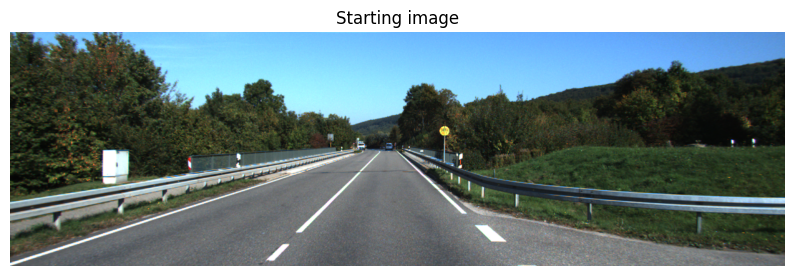

In [6]:
image_path = "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\road.png"
image = cv.imread(image_path)

lines_img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(lines_img_rgb)
plt.axis("off")
plt.title("Starting image")
plt.show()

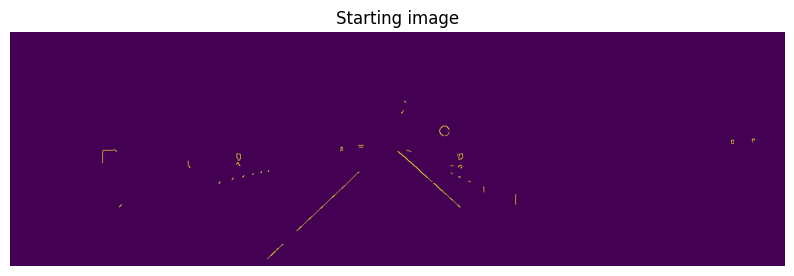

In [8]:
grey_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# The threshold values should be adapted to the image you have
# in order to achieve meaningful edges extraction
tl = 634
th = 854

canny_edges = cv.Canny(grey_image, tl, th)

plt.figure(figsize=(10, 10))
plt.imshow(canny_edges)
plt.axis("off")
plt.title("Starting image")
plt.show()

In [58]:
rho = 9
theta = 0.261
threshold = 2000


def hough_lines(
    edges: np.ndarray, threshold: float, min_theta: float, max_theta: float
) -> np.ndarray:
    # Initialize the counter matrix in polar coordinates
    diagonal = np.sqrt(image.shape[0] ** 2 + image.shape[1] ** 2)

    # Compute the values for the thetas and the rhos
    theta_angles = np.arange(min_theta, max_theta, theta)
    rho_values = np.arange(-diagonal, diagonal, rho)
    # Compute the dimension of the accumulator matrix
    num_thetas = len(theta_angles)
    num_rhos = len(rho_values)
    accumulator = np.zeros([num_rhos, num_thetas])
    print("Accumulator shape (rhos x thetas):" + str(accumulator.shape))
    # Pre-compute sin and cos
    sins = np.sin(theta_angles)
    coss = np.cos(theta_angles)

    # Consider edges only
    xs, ys = np.where(edges > 0)

    for x, y in zip(xs, ys):
        for t in range(num_thetas):
            # compute the rhos for the given point for each theta
            current_rho = x * coss[t] + y * sins[t]
            # for each rho, compute the closest rho among the rho_values below it
            # the index corresponding to that rho is the one we will increase
            rho_pos = np.where(current_rho > rho_values)[0][-1]
            # rho_pos = np.argmin(np.abs(current_rho - rho_values))
            accumulator[rho_pos, t] += 1

        # Take the polar coordinates most matched
    final_rho_index, final_theta_index = np.where(accumulator > threshold)
    final_rho = rho_values[final_rho_index]
    final_theta = theta_angles[final_theta_index]

    polar_coordinates = np.vstack([final_rho, final_theta]).T

    return polar_coordinates

In [32]:
#Funtion to add lines to an image
def draw_lines(img: np.ndarray, lines: np.ndarray, color: tp.List[int] = [0, 0, 255], thickness: int = 1) -> tp.Tuple[np.ndarray]:
    new_image = np.copy(img)
    empty_image = np.zeros(img.shape[:2])

    if len(lines.shape) == 1:
        lines = lines[None, ...]

    # Draw found lines
    for rho, theta in lines:
        x0 = polar2cartesian(rho, theta)
        direction = np.array([x0[1], -x0[0]])
        pt1 = np.round(x0 + 1000*direction).astype(int)
        pt2 = np.round(x0 - 1000*direction).astype(int)
        empty_image = cv.line(img=empty_image,pt1=pt1, pt2=pt2, color=255, thickness=thickness)

    # Keep lower part of each line until intersection
    mask_lines = empty_image != 0
    min_diff = np.inf
    max_line = 0
    for i in range(mask_lines.shape[0]):
        line = mask_lines[i]
        indices = np.argwhere(line)
        try:
            if indices[-1] - indices[0] < min_diff:
                min_diff = indices[-1] - indices[0]
                max_line = i
        except Exception as e:
            print(f"Exception {e}")
            continue
        
    mask_boundaries = np.zeros_like(empty_image)
    mask_boundaries[max_line:] = 1
    mask = (mask_lines * mask_boundaries).astype(bool)

    new_image[mask] = np.array(color)
    
    return new_image, mask

# Function to perform the conversion between polar and cartesian coordinates
def polar2cartesian(radius: np.ndarray, angle: np.ndarray, cv2_setup: bool = True) -> np.ndarray:
    return radius * np.array([np.sin(angle), np.cos(angle)])

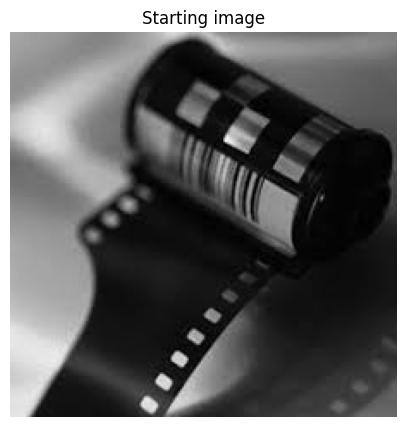

In [35]:
image_path = (
    "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\tape.jpg"
)
image = cv.imread(image_path)

lines_img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(lines_img_rgb)
plt.axis("off")
plt.title("Starting image")
plt.show()

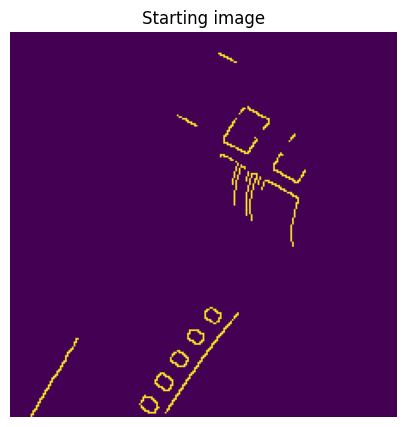

In [41]:
grey_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# The threshold values should be adapted to the image you have
# in order to achieve meaningful edges extraction
tl = 400
th = 500

canny_edges = cv.Canny(grey_image, tl, th)
plt.figure(figsize=(5, 5))
plt.imshow(canny_edges)
plt.axis("off")
plt.title("Starting image")
plt.show()

Accumulator shape (rhos x thetas):(71, 13)
[[ -2.49173218  -0.52679633]
 [141.50826782   1.30020367]
 [150.50826782   1.30020367]
 [159.50826782   0.77820367]
 [168.50826782   1.03920367]
 [177.50826782   1.03920367]
 [186.50826782   1.03920367]
 [204.50826782   0.77820367]]


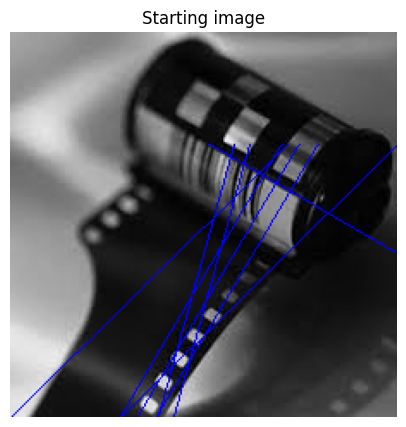

In [43]:
lines = hough_lines(canny_edges, threshold, -np.pi / 2, np.pi / 2)

print(lines)
# Show the image with the lines found
lines_img, mask = draw_lines(image, lines)

plt.figure(figsize=(5, 5))
plt.imshow(lines_img)
plt.axis("off")
plt.title("Starting image")
plt.show()

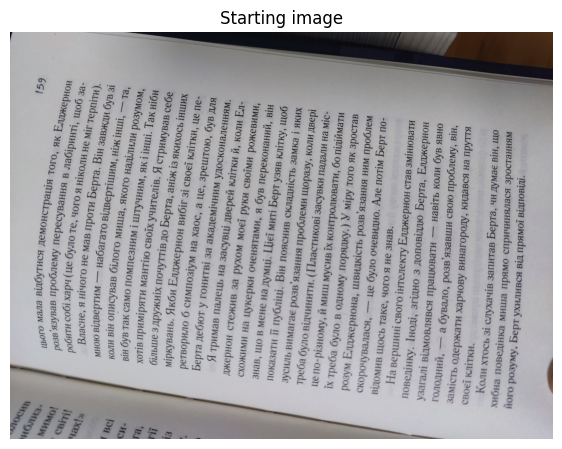

In [64]:
image_path = (
    "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\1_1.jpg"
)
image = cv.imread(image_path)

lines_img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7, 7))
plt.imshow(lines_img_rgb)
plt.axis("off")
plt.title("Starting image")
plt.show()

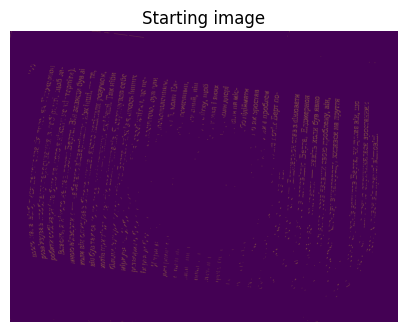

In [65]:
grey_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# The threshold values should be adapted to the image you have
# in order to achieve meaningful edges extraction
tl = 370
th = 250

canny_edges = cv.Canny(grey_image, tl, th)
plt.figure(figsize=(5, 5))
plt.imshow(canny_edges)
plt.axis("off")
plt.title("Starting image")
plt.show()

Accumulator shape (rhos x thetas):(1112, 13)
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception index -1 is out of bounds for axis 0 with size 0
Exception i

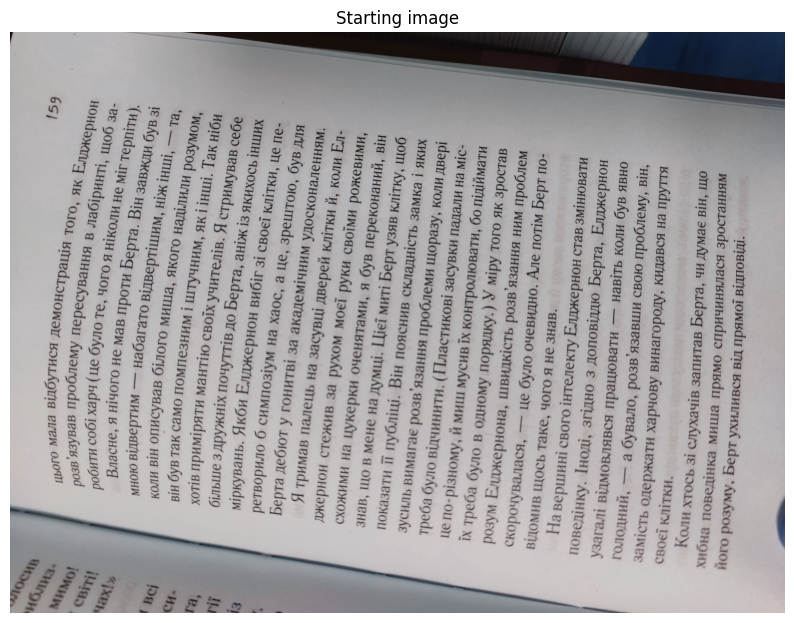

In [66]:
lines = hough_lines(canny_edges, threshold, -np.pi / 2, np.pi / 2)
# Show the image with the lines found
lines_img, mask = draw_lines(image, lines)

plt.figure(figsize=(10, 10))
plt.imshow(lines_img)
plt.axis("off")
plt.title("Starting image")
plt.show()